## Phase and Group Velocities

Until now, we've mostly considered nonlinear interactions with continuous wave (CW) light. In this notebook we study some of the characteristics of pulses of light in preparation for studing nonlinear interactions with ultrashort pulses.

The main characteristic we need to study is dispersion, which is actually a *linear* effect, but has consequences on the propogation of pulses of light.  We have already seen the consequences of dispersion in phase matching.  

Dispersion results when different frequencies of light travel at different speeds in a material.  This results in the familiar dispersive properties of prisms, but also has important consequences for the time-dependent nature of light.  Consider for example a light wave made up of two sinusoidal plane waves $E_1$ and $E_2$:

\begin{align}
E_1 = Ee^{j\left[(k + \Delta k/2)z - (\omega + \Delta \omega/2)t \right]} \nonumber \\
E_2 = Ee^{j\left[(k - \Delta k/2)z - (\omega - \Delta \omega/2)t \right]}
\end{align}

We can visualize these wave propogating in a material in which each wave propagates with a different speed.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import ipywidgets as ipw

from scipy.constants import *


def update(t = 0):
    E1 = np.sin((k+dk/2)*z - (omega+domega/2)*t) - 2
    E2 = np.sin((k-dk/2)*z - (omega-domega/2)*t)
    Esum = E1 + E2 + 6
    line0.set_ydata(E1) 
    line1.set_ydata(E2) 
    line2.set_ydata(Esum) 


dlambda = 0.03 # microns   
lam1 = 1.5 # microns
lam2 = lam1 + dlambda

omega1 = 2*pi*c/lam1*1e-9  # rad/ns
omega2 = 2*pi*c/lam2*1e-9  #rad/ns
omega = (omega1+omega2)/2
domega = omega1-omega2
    

n1 = 1
n2 = 1.1


k1 = 2*pi*n1/lam1
k2 = 2*pi*n2/lam2
k = (k1+k2)/2
dk = k2-k1

Lam = 2*pi/k1

z = np.linspace(0, 20*Lam, 1000)

fig, ax = plt.subplots()
dummy_E = np.zeros_like(z)
line0, = ax.plot(z, dummy_E, label = 'E_1', color = 'blue')
line1, = ax.plot(z, dummy_E, label = 'E_2', color = 'red')
line2, = ax.plot(z, dummy_E, label = 'E_sum', color = 'purple')
#ax.plot(N, p2)

ax.set_xlabel('z [$\mu$m]')
ax.set_ylim(-4.1, 8.1)

T = 2*pi/omega1 # ns
ipw.interact(update, t = (0, 20*T, 0.001*T ))

#plt.plot(z,I2)
plt.show()

In [ ]:
#print phase and group velocities
print(omega/k)
print(domega/dk)

The speed at which the two individual waves propagate is called the *phase* velocity.  the speed at which teh envelope propagates is called the *group* velocity.  Mathematically, we can write the phase velocity for any one wave as

\begin{align}
v_p = \frac{\omega}{k}
\end{align}

What about the sum of the waves? Well, we can write their sum as

\begin{align}
E_{sum} &= E_1+E_2 \nonumber \\
        &= Ee^{j(kz - \omega t)}e^{j(\Delta kz - \Delta \omega t)}
\end{align}

which clearly shows an evelope with velocity $\Delta \omega / \Delta k$.  In general, the velocity of the envelope, or group velocity, is equal to

\begin{align}
v_g = \frac{d\omega}{dk}
\end{align}

What if we have many waves?  Let's try the animation again, but include many more frequency components.



<IPython.core.display.Javascript object>


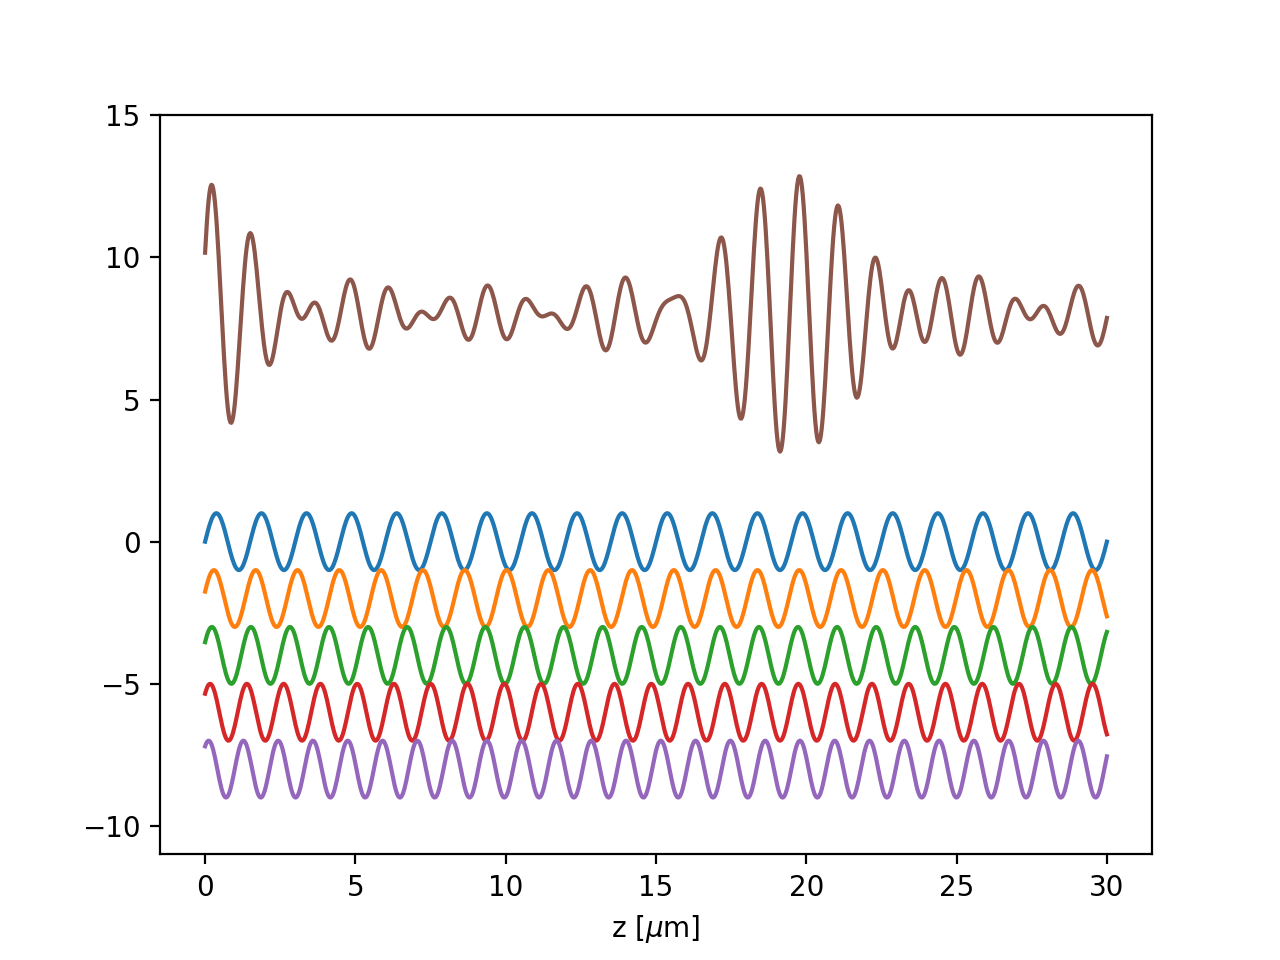

interactive(children=(FloatSlider(value=0.0, description='t', max=100.06922855944563, step=0.00500346142797228…

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import ipywidgets as ipw

from scipy.constants import *


def update(t = 0):
    for m in range(N):
        E[m] = np.sin((k[m])*z - (omega[m]*t)) 
        line[m].set_ydata(E[m]- 2*m)
    E_sum = np.sum(E,0) + 2*m
    line[m+1].set_ydata(E_sum)


N = 5    
dlam = 0.03 # microns   
lam1 = 1.5 # microns
lam2 = lam1 + (N)*dlam
lam = np.arange(lam1, lam2, dlam)
omega = 2*pi*c/lam*1e-9  # rad/ns

n1 = 1
dn = 0.1
n2 = n1 + (N)*dn
n = np.arange(n1, n2, dn)

k = 2*pi*n/lam


Lam = 2*pi/k[0]

z = np.linspace(0, 20*Lam, 1000)

fig, ax = plt.subplots()
dummy_E = np.zeros_like(z)
E = [None]*N                    

line = [None]*(N+1)
for m in range(N+1):
    line[m], = ax.plot(z, dummy_E)

#ax.plot(N, p2)

ax.set_xlabel('z [$\mu$m]')
ax.set_ylim(-2*m - 1, 2*m + N)

T = 2*pi/omega[0] # ns
ipw.interact(update, t = (0, 20*T, 0.001*T ))

#plt.plot(z,I2)
plt.show()

# Exercise
1. Design a simulation with N individuals waves spaced equally in frequency all propogating in the same medium, but with different amplitudes.  Choose the amplitude distribution of the waves to be a gaussian with a peak value of 1 centered around thed mean frequency component.  Create a function n that allows you to set the frequency-dependent refractive index to a 4-th order polynomial function of your choosing i.e. $n(\lambda) = A\lambda^3 + B\lambda^2 + C\lambda + D$.  Find values of A, B, C, D that give phase velocity twice as fast as the group velocity, and 